In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('top10s.csv', encoding = 'cp1252')

In [20]:
data

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [21]:
df = data.drop(['Unnamed: 0', 'top genre', 'year', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop'], axis = 1)
df

,title,artist,bpm,nrgy,dur
0,"Hey, Soul Sister",Train,97,89,217
1,Love The Way You Lie,Eminem,87,93,263
2,TiK ToK,Kesha,120,84,200
3,Bad Romance,Lady Gaga,119,92,295
4,Just the Way You Are,Bruno Mars,109,84,221
...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,104,66,176
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,95,79,206
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,136,76,260
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,114,79,217


In [22]:
df_new = df.drop(['title', 'artist'], axis = 1)
df_new=(df_new-df_new.mean())/df_new.std()
df_new

,bpm,nrgy,dur
0,-0.868937,1.133973,-0.224874
1,-1.272238,1.379211,1.122912
2,0.058656,0.827425,-0.722969
3,0.018326,1.317902,2.060502
4,-0.384975,0.827425,-0.107675
...,...,...,...
598,-0.586626,-0.276147,-1.426161
599,-0.949597,0.520877,-0.547170
600,0.703938,0.336949,1.035013
601,-0.183325,0.520877,-0.224874


In [23]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

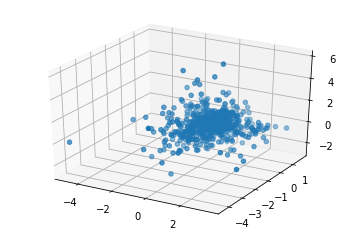

In [24]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter3D(df_new['bpm'], df_new['nrgy'], df_new['dur'])


In [25]:
from sklearn.cluster import KMeans

In [100]:
#create a list of each penalty, for 1-9 clusters
penalties = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(df_new)
    penalty = kmeans.inertia_ #this is the penalty for i clusters
    penalties.append(penalty) #add to the []

In [101]:
print(penalties)

[1805.9999999999989, 1342.1956057155828, 1089.180600345537, 872.2317402543422, 759.5053532590157, 684.3781213645159, 617.6086798250759, 565.3040194044222, 520.4785386929617]


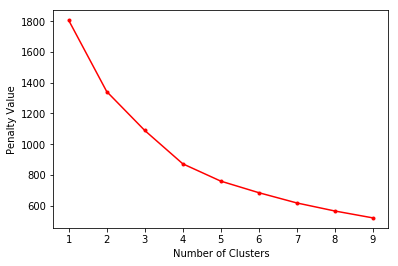

In [102]:
xaxis = [1,2,3,4,5,6,7,8,9]
plt.plot(xaxis, penalties, '.r-')
plt.xlabel('Number of Clusters')
plt.ylabel('Penalty Value')
plt.show()

In [105]:
y = KMeans(n_clusters = 4).fit_predict(df_new)
y

array([1, 0, 1, 0, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 0, 3, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 2, 2, 3, 2, 1,
       3, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 3, 0, 0, 1, 3, 1, 0, 2, 1, 3, 1, 0, 1, 1, 1, 1, 0, 3,
       1, 1, 1, 0, 0, 1, 3, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 3,
       3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 3, 1, 2, 3, 1, 1, 3, 2, 0, 2, 1, 1,
       0, 1, 1, 2, 3, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 3, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 3, 0, 0, 1, 0, 1, 3, 1, 0, 2, 0, 1,
       2, 1, 2, 1, 0, 0, 1, 1, 1, 3, 1, 0, 3, 3, 1, 2, 2, 2, 3, 0, 1, 1,
       3, 1, 1, 3, 1, 0, 0, 0, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 0,
       1, 1, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 1, 3, 0, 0, 1, 1, 3, 3, 2, 3,
       1, 3, 1, 0, 0, 3, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 2, 1, 1, 3, 3, 1,
       2, 1, 2, 1, 1, 1, 3, 0, 3, 0, 1, 1, 1, 1, 2,

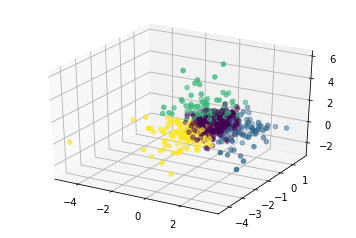

In [104]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter3D(df_new['bpm'], df_new['nrgy'], df_new['dur'], c = y)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
...     df_new, y, test_size=0.33)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'Testing Accuracy')

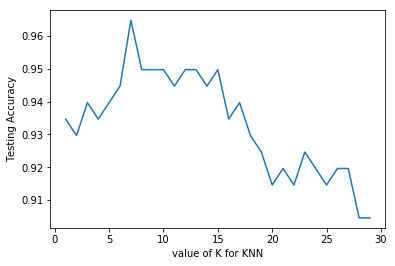

In [16]:
plt.plot(k_range,scores_list)
plt.xlabel("value of K for KNN")
plt.ylabel("Testing Accuracy")

In [41]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [42]:
y_pred = knn.predict(X_test)

In [43]:
knn.score(X_test,y_test)

0.964824120603015

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
forest_pred = RFC.predict(X_test)

In [23]:
RFC.score(X_test, y_test)

0.9447236180904522

In [24]:
RFC = RandomForestClassifier(criterion = 'entropy')
RFC.fit(X_train, y_train)
forest_pred = RFC.predict(X_test)
RFC.score(X_test, y_test)

0.9447236180904522

In [25]:
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(X_train, y_train)
forest_pred = RFC.predict(X_test)
RFC.score(X_test, y_test)

0.9447236180904522

In [26]:
RFC = RandomForestClassifier(n_estimators = 200, max_features = 'log2')
RFC.fit(X_train, y_train)
forest_pred = RFC.predict(X_test)
RFC.score(X_test, y_test)

0.9447236180904522

In [27]:
from sklearn.svm import SVC

In [28]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm.score(X_test, y_test)

0.9748743718592965

In [29]:
degrees = [1,2,3,4,5,6,7,8,9]
for i in range(len(degrees)):
    svm = SVC(degree = degrees[i])
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    print('Polynomial of degree', degrees[i], 'accuracy is', svm.score(X_test, y_test))

Polynomial of degree 1 accuracy is 0.9748743718592965
Polynomial of degree 2 accuracy is 0.9748743718592965
Polynomial of degree 3 accuracy is 0.9748743718592965
Polynomial of degree 4 accuracy is 0.9748743718592965
Polynomial of degree 5 accuracy is 0.9748743718592965
Polynomial of degree 6 accuracy is 0.9748743718592965
Polynomial of degree 7 accuracy is 0.9748743718592965
Polynomial of degree 8 accuracy is 0.9748743718592965
Polynomial of degree 9 accuracy is 0.9748743718592965


In [30]:
kernels = ['sigmoid', 'poly', 'rbf', 'linear']
for i in range(len(kernels)):
    svm = SVC(kernel = kernels[i])
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    print(kernels[i], 'accuracy is', svm.score(X_test, y_test))

sigmoid accuracy is 0.9547738693467337
poly accuracy is 0.8592964824120602
rbf accuracy is 0.9748743718592965
linear accuracy is 0.949748743718593


In [31]:
gammas = [0.01, 0.1, 1, 10, 100]
for i in range(len(gammas)):
    svm = SVC(gamma = gammas[i])
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    print('\u03BB =', gammas[i], 'accuracy is', svm.score(X_test, y_test))

λ = 0.01 accuracy is 0.8140703517587939
λ = 0.1 accuracy is 0.949748743718593
λ = 1 accuracy is 0.9698492462311558
λ = 10 accuracy is 0.8542713567839196
λ = 100 accuracy is 0.49748743718592964


In [40]:
svm = SVC(kernel = 'rbf', gamma = 1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm.score(X_test, y_test)

0.9698492462311558

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, svm_pred)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5,15,'Predicted label')

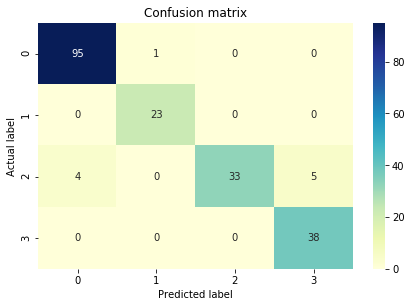

In [34]:
class_names=['0','1','2','3'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [36]:
list0 = ClusterIndicesNumpy(0, y_pred)
for i in range(len(list0)):
    print(df['title'][list0[i]], 'by' , df['artist'][list0[i]])

Hey, Soul Sister by Train
Bad Romance by Lady Gaga
Just the Way You Are by Bruno Mars
Secrets by OneRepublic
Only Girl (In The World) by Rihanna
Club Can't Handle Me (feat. David Guetta) by Flo Rida
Marry You by Bruno Mars
Cooler Than Me - Single Mix by Mike Posner
Like A G6 by Far East Movement
The Time (Dirty Bit) by The Black Eyed Peas
Alejandro by Lady Gaga
Your Love Is My Drug by Kesha
Whataya Want from Me by Adam Lambert
Take It Off by Kesha
Animal by Neon Trees
Naturally by Selena Gomez & The Scene
I Like It by Enrique Iglesias
California Gurls by Katy Perry
My First Kiss - feat. Ke$ha by 3OH!3
Imma Be by The Black Eyed Peas
Try Sleeping with a Broken Heart by Alicia Keys
Sexy Bitch (feat. Akon) by David Guetta
Bound To You - Burlesque Original Motion Picture Soundtrack by Christina Aguilera
If I Had You by Adam Lambert
Dog Days Are Over by Florence + The Machine
Something's Got A Hold On Me - Burlesque Original Motion Picture Soundtrack by Christina Aguilera
Doesn't Mean Anythi

In [37]:
list1 = ClusterIndicesNumpy(1, y_pred)
for i in range(len(list1)):
    print(df['title'][list1[i]], 'by' , df['artist'][list1[i]])


Love The Way You Lie by Eminem
TiK ToK by Kesha
Empire State of Mind (Part II) Broken Down by Alicia Keys
OMG (feat. will.i.am) by Usher
Misery by Maroon 5
Not Myself Tonight by Christina Aguilera
What the Hell by Avril Lavigne
Monster by Kanye West
Party Rock Anthem by LMFAO
We Found Love by Rihanna
1+1 by Beyoncé
Invading My Mind by Jennifer Lopez
Turn Up the Music by Chris Brown
Wake Me Up by Avicii
Impossible by James Arthur
Feel This Moment (feat. Christina Aguilera) by Pitbull
If I Lose Myself - Alesso vs OneRepublic by OneRepublic
Daylight by Maroon 5
Walks Like Rihanna by The Wanted
Next To Me by Emeli Sandé
We Own The Night by The Wanted


In [38]:
list2 = ClusterIndicesNumpy(2, y_pred)
for i in range(len(list2)):
    print(df['title'][list2[i]], 'by' , df['artist'][list2[i]])


Baby by Justin Bieber
Eenie Meenie by Sean Kingston
All The Right Moves by OneRepublic
3 by Britney Spears
DJ Got Us Fallin' In Love (feat. Pitbull) by Usher
Just the Way You Are by Bruno Mars
Love On Top by Beyoncé
Grenade by Bruno Mars
We R Who We R by Kesha
Price Tag by Jessie J
E.T. by Katy Perry
Last Friday Night (T.G.I.F.) by Katy Perry
Locked Out of Heaven by Bruno Mars
I Knew You Were Trouble. by Taylor Swift
We Are Never Ever Getting Back Together by Taylor Swift
Stronger (What Doesn't Kill You) by Kelly Clarkson
Good Time by Owl City
Glad You Came by The Wanted
Beauty And A Beat by Justin Bieber
Some Nights by fun.
Part Of Me by Katy Perry
Diamonds by Rihanna
Underneath the Tree by Kelly Clarkson
Just Give Me a Reason (feat. Nate Ruess) by P!nk
Hall of Fame by The Script
I Love It (feat. Charli XCX) by Icona Pop
Move by Little Mix
Mirrors - Radio Edit by Justin Timberlake
TKO by Justin Timberlake
Atlas - From “The Hunger Games: Catching Fire” Soundtrack by Coldplay
Anything C

In [39]:
list3 = ClusterIndicesNumpy(3, y_pred)
for i in range(len(list3)):
    print(df['title'][list3[i]], 'by' , df['artist'][list3[i]])


Dynamite by Taio Cruz
Telephone by Lady Gaga
Meet Me Halfway by The Black Eyed Peas
Teenage Dream by Katy Perry
Blah Blah Blah (feat. 3OH!3) by Kesha
Rock That Body by The Black Eyed Peas
You Lost Me by Christina Aguilera
Someone Like You by Adele
Give Me Everything by Pitbull
Run the World (Girls) by Beyoncé
Moves Like Jagger - Studio Recording From The Voice Performance by Maroon 5
Born This Way by Lady Gaga
Marry You by Bruno Mars
Good Life by OneRepublic
On The Floor by Jennifer Lopez
What's My Name? by Rihanna
You And I by Lady Gaga
Please Don't Go by Mike Posner
Turning Page by Sleeping At Last
Moment 4 Life - Album Version (Edited) by Nicki Minaj
Muny - Album Version (Edited) by Nicki Minaj
Payphone by Maroon 5
Love You Like A Love Song by Selena Gomez & The Scene
Set Fire to the Rain by Adele
International Love by Pitbull
Boyfriend by Justin Bieber
The One That Got Away by Katy Perry
Lights - Single Version by Ellie Goulding
Don't Stop the Party (feat. TJR) by Pitbull
It Will R

In [68]:
from sklearn.cluster import MiniBatchKMeans

In [69]:
clustering = MiniBatchKMeans(n_clusters = 4)

In [74]:
clustering = clustering.partial_fit(df_new)

In [75]:
clustering.labels_

array([1, 1, 1, 0, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 2,
       3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 3,
       1, 1, 2, 3, 3, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 3, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1, 1, 1, 1, 3, 1, 2, 0, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 2, 1, 1, 1, 1,
       2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 3, 2, 0, 2, 3, 2,
       1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 2, 1, 1, 0, 3, 3, 1, 1, 0, 0, 1, 1,
       3, 1, 3, 1, 1, 2, 0, 0, 1, 1, 3, 0, 0, 3, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 1, 0, 1, 3, 2, 1, 0, 1, 0, 0, 3, 1, 2, 2, 2, 2, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 0, 3, 3, 1, 3, 3, 2, 2, 1, 3, 1, 3, 1, 3, 1, 0,
       3, 1, 1, 2, 3, 1, 2, 2, 0, 1, 2, 2, 1, 3, 0, 0, 1, 1, 3, 3, 2, 3,
       1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 2, 0, 3, 2, 3, 3, 3, 3, 1,
       2, 3, 2, 1, 1, 2, 3, 1, 3, 0, 3, 2, 3, 3, 2,

In [95]:
clustering = clustering.labels_.tolist()

In [98]:
def rand_index(x, y):
    count = 0
    for i in range(len(x)):
        if x[i] == y[i]:
            count += 1
    score = count/len(x)
    print(score)

In [106]:
rand_index(clustering, y)

0.7379767827529021
